# **Bigmart Outlet Sales Prediction**

# Project Description:


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 



**1. Problem Statement:** 

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Using this predictive model, the Bigmart will be able to focus more on the products which have high sales and figure out which products have low sales to understand that issue as well.

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their Description

* Item_Identifier: Unique product ID
* Item_Weight : Weight of product
* Item_Fat_Content : Checks the Concentration of fat in the product
* Item_Visibility : The % of total display area of all similar products in a store
* Item_Type: Category
* Item_MRP : Maximum Retail Price for a Product
* Outlet_Identifier : Store ID
* Outlet_Establishment_Year :The year in which store was established
* Outlet_Size :The size of the store (Area Size Category)
* Outlet_Location_Type :In Terms of city Tiers (Size)
* Outlet_Type :Grocery store or a type of supermarket
* Item_Outlet_Sales : Sales of the product In the Specific outlet

**Importing important Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as CVS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

**Datasets: Train and Test data**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_train = '/content/drive/MyDrive/train data mini project technocolabs'
path_test = '/content/drive/MyDrive/test data mini project technocolabs'

train_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)

**Exploring the datasets:**

In [ ]:
train_data.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


**Combining both the datasets, since they look similar:**

In [ ]:
data = pd.concat([train_data, test_data], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 12)


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


**Inference:**

*   7 object type columns (categorical)

*  4 float type columns (numerical)
 
* 1 integer type column (numerical)




In [ ]:
data.describe(include=[object , np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


**Checking for Missing Values and filling them:**

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [ ]:
#filling the object values with mode and float type with mean

data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
data['Item_Weight'] = data.Item_Weight.fillna(data.Item_Weight.mean())

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

**Dealing with Numeric Data:**

 * Item_Weight
 * item_Visibility
 * Item_MRP
 * Outlet_Establishment_Year
 * Item_Outlet_Sales

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales'>

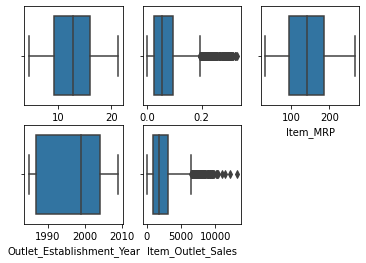

In [ ]:
#checking for outliers

plt.figsize = (16,8)
plt.subplot(2,3,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(data['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(data['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(data['Item_Outlet_Sales'])

Upper limit:  0.19453961000000003
Lower limit:  -0.07346667400000001


Text(0.5, 1.0, 'Item_Visibility Distribution after removing outliers')

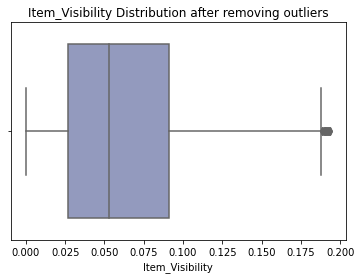

In [ ]:
#removing ouliers

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = data[(data['Item_Visibility'] > lower) & (data['Item_Visibility'] < upper)]


sns.boxplot(x=data['Item_Visibility'], palette='BuPu')
plt.title('Item_Visibility Distribution after removing outliers')

Upper limit:  6497.7086500000005
Lower limit:  -2497.2493500000005


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

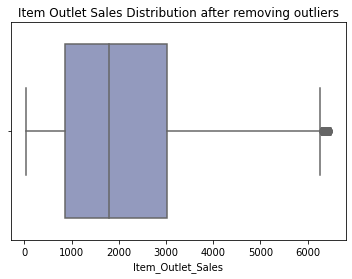

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')




<AxesSubplot:>

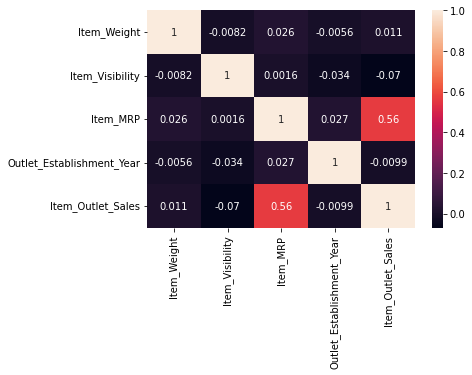

In [ ]:
#correlation matrix


plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

**Dealing With Categorical Data:**

* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type


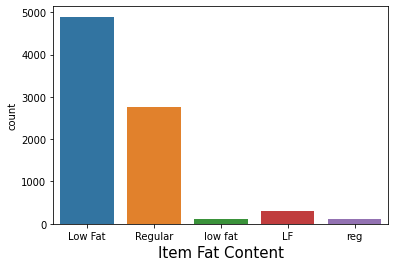

In [ ]:
#Data Visualisation
#Countplot for Item_Fat_Content

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()



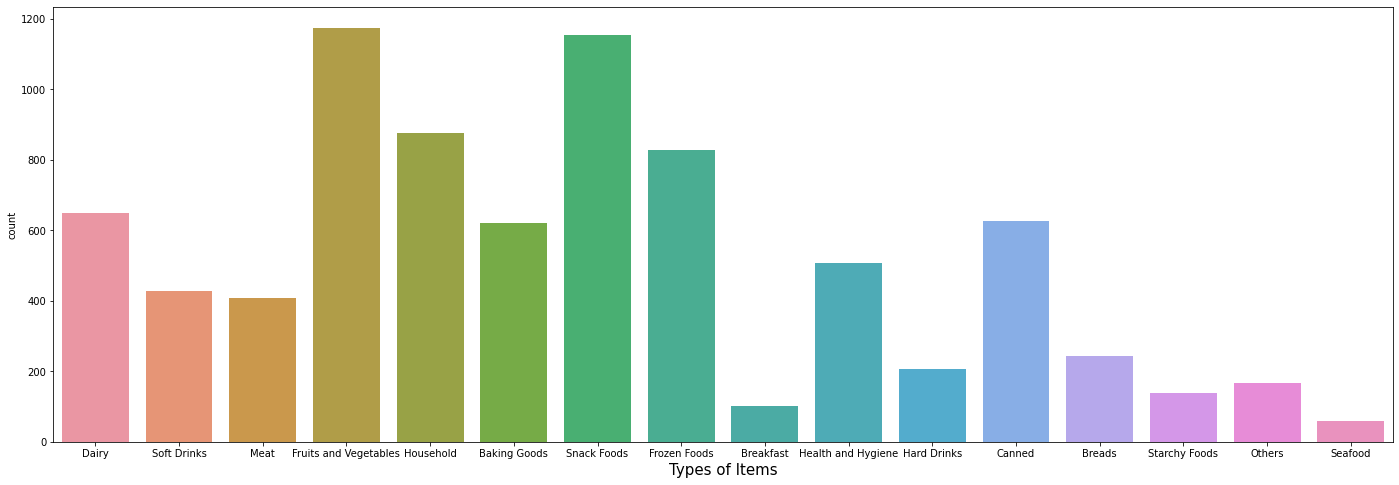

In [ ]:
#Countplot for Item_Type

plt.figure(figsize=(24,8))
sns.countplot(data=data, x='Item_Type')
plt.xlabel('Types of Items', fontsize=15)
plt.show()

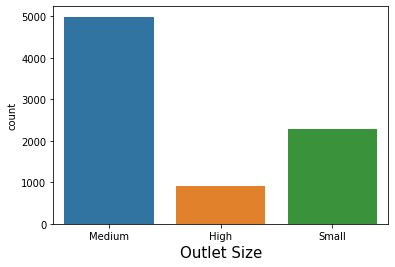

In [ ]:
#Countplot for Outlet_Size

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Outlet Size', fontsize=15)
plt.show()

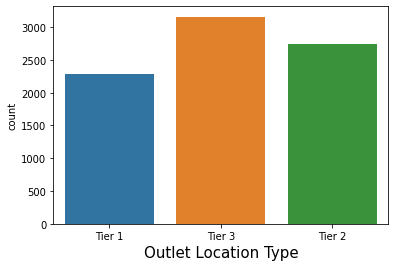

In [ ]:
#Countplot for Outlet_Location_Type

plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Outlet Location Type', fontsize=15)
plt.show()

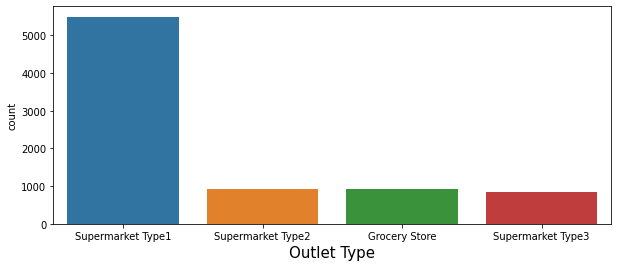

In [ ]:
#countplot for Outlet_Type

plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Outlet Type', fontsize=15)
plt.show()

**Data Visualisation for Numeric Columns:**


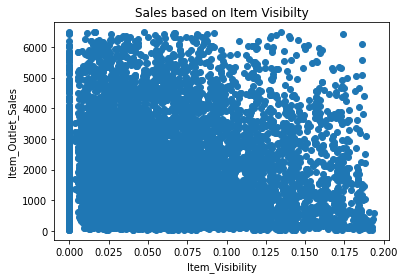

In [ ]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

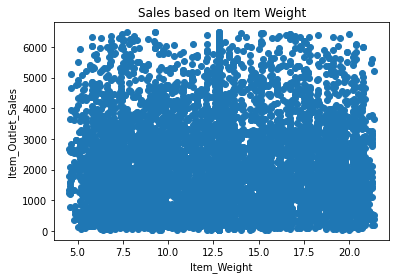

In [ ]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

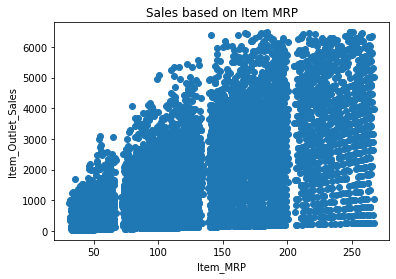

In [ ]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

**Feature Engineering:**



We have 7 categorial columns

 *Ordinal Data:*

* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type 

*Nominal Data:*
* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Type


Since Item_Identifier, Outlet_Identifier don't have significant values, we can drop them.

In [ ]:
data = data.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'],axis = 1)

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8189, 10)

In [ ]:
#Label Encoder for Ordinate Data

le = LabelEncoder()
label = ['Item_Fat_Content' , 'Outlet_Type' , 'Outlet_Size','Outlet_Location_Type'  ]

for i in label:
  data[i] = le.fit_transform(data[i])
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,Meat,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,Household,53.8614,1987,0,2,1,994.7052


In [ ]:
# One-Hot encoding (OHE) for Nominal Data

cols = ['Item_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)

data_oh.index = data.index


new_data = pd.concat([data, data_oh], axis=1)
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,Meat,141.6180,1999,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,Household,53.8614,1987,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,Dairy,249.8092,1999,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,Meat,141.6180,1999,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,1998,1,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,Household,53.8614,1987,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data = new_data.drop(columns = ['Item_Type'],axis=1)

In [ ]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,249.8092,1999,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,2009,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,141.6180,1999,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,182.0950,1998,1,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,1987,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


**Splitting the train and test data:**

In [ ]:
x = data.drop(columns = ['Item_Outlet_Sales'],axis = 1)
y = data['Item_Outlet_Sales']




In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,1,0.016047,249.8092,1999,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,2,0.019278,48.2692,2009,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,1,0.016760,141.6180,1999,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,2,0.000000,182.0950,1998,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,1,0.000000,53.8614,1987,0,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

**Regression Models**:

1. Linear Regression
2. Lasso Regressor
3. Ridge Regression
4. Decision Tree Regressor
5. Random Forest Regressor
6. XGBoost Regressor


**Splitting the data into Train and Test**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

**Linear Regression Model:**

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)

lr_predict = model.predict(x_test)

#scores
mae_score = mean_absolute_error(y_test , lr_predict)
mse_score = mean_squared_error(y_test , lr_predict)
r2score = r2_score(y_test , lr_predict)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

#cross validation score
CVS(LinearRegression(),x,y)



 Mean Absolute Error: 811.2551892093893

 Squared Mean Squared Error: 1057.2233352498133

 R^2 Score: 0.48532486019955334



array([0.49131127, 0.48836275, 0.46310265, 0.47605114, 0.48782272])

Item_Visibility                   -915.850536
Outlet_Location_Type              -412.274308
Outlet_Size                       -331.296498
Item_Type_Breakfast               -186.989210
Item_Type_Dairy                    -96.471736
Item_Type_Household                -64.855289
Item_Type_Meat                     -50.205061
Item_Type_Health and Hygiene       -40.776544
Item_Type_Others                   -26.292928
Item_Type_Hard Drinks              -26.010848
Item_Type_Frozen Foods             -18.944383
Item_Type_Soft Drinks              -18.859093
Item_Weight                         -0.128145
Outlet_Establishment_Year            4.867634
Item_Type_Baking Goods               5.106734
Item_Fat_Content                     6.877514
Item_Type_Snack Foods                8.663639
Item_MRP                            14.190272
Item_Type_Canned                    25.130554
Item_Type_Fruits and Vegetables     30.837579
Item_Type_Breads                    37.789536
Item_Type_Starchy Foods           

<AxesSubplot:>

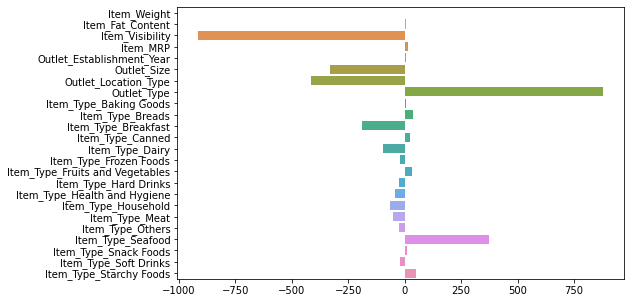

In [ ]:
# vasulization of model's perfomance
LR_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)

**Lasso Regression Model:**

In [ ]:
model = Lasso()
model.fit(x_train , y_train)

lasso_prediction = model.predict(x_test)

#checking for scores
mae_score = mean_absolute_error(y_test , lasso_prediction)
mse_score = mean_squared_error(y_test , lasso_prediction)
r2_score = r2_score(y_test , lasso_prediction)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

#cross validation score
CVS(Lasso(),x,y)

 Mean Absolute Error: 810.3742395702541

 Squared Mean Squared Error: 1055.930678553932

 R^2 Score: 0.48532486019955334



array([0.49139261, 0.48936348, 0.46297767, 0.47799779, 0.48862312])

Item_Visibility                   -431.524533
Outlet_Location_Type              -408.102275
Outlet_Size                       -326.392413
Item_Type_Breakfast               -106.817350
Item_Type_Dairy                    -75.657954
Item_Type_Household                -43.190341
Item_Type_Meat                     -17.840670
Item_Type_Health and Hygiene       -10.391774
Item_Weight                         -0.100752
Item_Type_Others                    -0.000000
Item_Type_Hard Drinks               -0.000000
Item_Type_Frozen Foods              -0.000000
Item_Type_Starchy Foods              0.000000
Item_Type_Soft Drinks               -0.000000
Item_Type_Baking Goods               0.751557
Outlet_Establishment_Year            4.939799
Item_Fat_Content                     7.361906
Item_Type_Snack Foods               11.758413
Item_Type_Breads                    12.609539
Item_MRP                            14.196521
Item_Type_Canned                    20.661293
Item_Type_Fruits and Vegetables   

<AxesSubplot:>

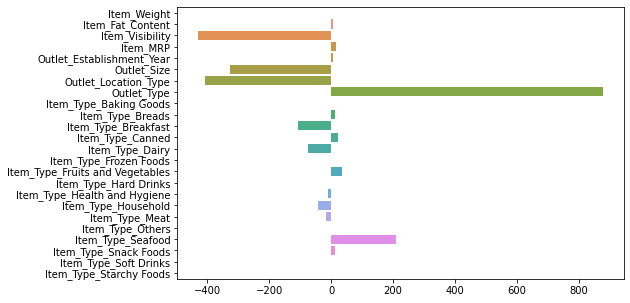

In [ ]:
#visualisation for model's performance
LS_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LS_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)

**Ridge Regression Model:**

In [ ]:
model = Ridge()
model.fit(x_train , y_train)

ridge_prediction = model.predict(x_test)

#scores
mae_score = mean_absolute_error(y_test , ridge_prediction)
mse_score = mean_squared_error(y_test , ridge_prediction)

print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")


#cross validation score
CVS(Ridge(),x,y)

 Mean Absolute Error: 811.1556175000892

 Squared Mean Squared Error: 1057.1375776966106



array([0.49127124, 0.48836153, 0.46306728, 0.47619419, 0.48787307])

Item_Visibility                   -853.675409
Outlet_Location_Type              -412.099008
Outlet_Size                       -331.192441
Item_Type_Breakfast               -185.239666
Item_Type_Dairy                    -96.095743
Item_Type_Household                -64.051195
Item_Type_Meat                     -49.249514
Item_Type_Health and Hygiene       -39.652035
Item_Type_Hard Drinks              -25.367707
Item_Type_Others                   -25.222945
Item_Type_Frozen Foods             -18.502915
Item_Type_Soft Drinks              -18.092629
Item_Weight                         -0.121075
Outlet_Establishment_Year            4.883825
Item_Type_Baking Goods               5.433300
Item_Fat_Content                     6.832501
Item_Type_Snack Foods                9.138827
Item_MRP                            14.190808
Item_Type_Canned                    25.392162
Item_Type_Fruits and Vegetables     31.269295
Item_Type_Breads                    37.892758
Item_Type_Starchy Foods           

<AxesSubplot:>

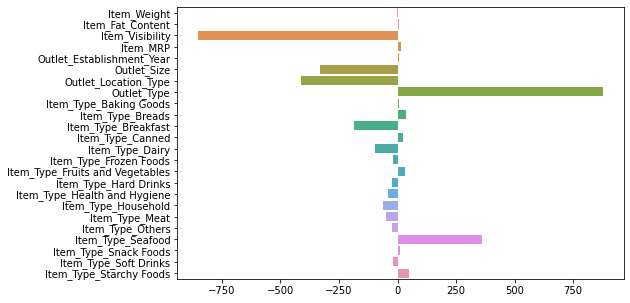

In [ ]:
#visualisation for model's performance
RD_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(RD_coef)
plt.figure(figsize=(8,5))
sns.barplot(model.coef_,model.feature_names_in_)

**Decision Tree Model:**

In [ ]:
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model.fit(x_train, y_train)

tree_predict = model.predict(x_test)

# Score Metrics 
DR_MAE = mean_absolute_error(y_test, tree_predict)
DR_MSE = mean_squared_error(y_test, tree_predict)

print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")


# Cross Validation Score check
CVS(DecisionTreeRegressor(),x,y)

 Mean Absolute Error: 705.2344418436395

 Mean Squared Error: 921128.4361973745



array([0.13213487, 0.15895298, 0.13227125, 0.13926772, 0.10189213])

Item_MRP                           0.575454
Outlet_Type                        0.413635
Item_Weight                        0.003991
Item_Visibility                    0.002395
Outlet_Location_Type               0.001423
Outlet_Establishment_Year          0.001172
Item_Fat_Content                   0.000997
Outlet_Size                        0.000933
Item_Type_Health and Hygiene       0.000000
Item_Type_Soft Drinks              0.000000
Item_Type_Snack Foods              0.000000
Item_Type_Seafood                  0.000000
Item_Type_Others                   0.000000
Item_Type_Meat                     0.000000
Item_Type_Household                0.000000
Item_Type_Dairy                    0.000000
Item_Type_Hard Drinks              0.000000
Item_Type_Fruits and Vegetables    0.000000
Item_Type_Frozen Foods             0.000000
Item_Type_Canned                   0.000000
Item_Type_Breakfast                0.000000
Item_Type_Breads                   0.000000
Item_Type_Baking Goods          

<AxesSubplot:>

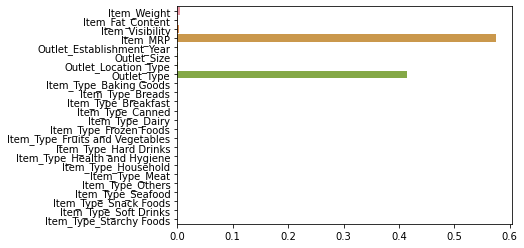

In [ ]:
#visualisation for model's performance

DR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(DR_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

**Random Forest model:**

In [ ]:
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
model.fit(x_train, y_train)


forest_predict = model.predict(x_test)

# Score Matrics
RFR_MAE = mean_absolute_error(y_test, forest_predict)
RFR_MSE = mean_squared_error(y_test, forest_predict)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")

CVS(RandomForestRegressor(),x, y)

 Mean Absolute Error: 702.7486844755164

 Mean Squared Error: 904577.7750981253



array([0.5312477 , 0.51556106, 0.49357281, 0.51992084, 0.53276538])

Item_MRP                           0.581484
Outlet_Type                        0.390473
Outlet_Establishment_Year          0.021684
Item_Weight                        0.002649
Item_Visibility                    0.001957
Outlet_Location_Type               0.001024
Item_Fat_Content                   0.000430
Outlet_Size                        0.000283
Item_Type_Fruits and Vegetables    0.000016
Item_Type_Health and Hygiene       0.000000
Item_Type_Soft Drinks              0.000000
Item_Type_Snack Foods              0.000000
Item_Type_Seafood                  0.000000
Item_Type_Others                   0.000000
Item_Type_Meat                     0.000000
Item_Type_Household                0.000000
Item_Type_Dairy                    0.000000
Item_Type_Hard Drinks              0.000000
Item_Type_Frozen Foods             0.000000
Item_Type_Canned                   0.000000
Item_Type_Breakfast                0.000000
Item_Type_Breads                   0.000000
Item_Type_Baking Goods          

<AxesSubplot:>

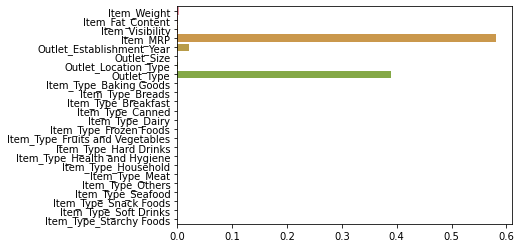

In [ ]:
# vasulization of model's perfomance
RFR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(RFR_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

**XGB Regressor:**

In [ ]:
model = XGBRegressor()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# Score Matrix
XG_MAE = mean_absolute_error(y_test, y_predict)
XG_MSE = mean_squared_error(y_test, y_predict)

print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")


CVS(XGBRegressor(),x, y)

 Mean Absolute Error: 759.7388609842583

 Mean Squared Error: 1072678.0695611427



array([0.51898333, 0.51396261, 0.4721108 , 0.5012699 , 0.51353878])

Outlet_Type                        0.592790
Item_MRP                           0.074486
Outlet_Establishment_Year          0.047601
Item_Type_Seafood                  0.021462
Item_Type_Fruits and Vegetables    0.019962
Item_Type_Snack Foods              0.017091
Item_Type_Dairy                    0.017010
Item_Type_Canned                   0.016601
Item_Type_Hard Drinks              0.016358
Item_Type_Breakfast                0.016084
Item_Type_Frozen Foods             0.014818
Item_Type_Soft Drinks              0.014108
Outlet_Size                        0.013919
Outlet_Location_Type               0.013018
Item_Visibility                    0.012963
Item_Weight                        0.011561
Item_Type_Starchy Foods            0.011509
Item_Type_Health and Hygiene       0.011467
Item_Type_Baking Goods             0.010721
Item_Type_Others                   0.009754
Item_Type_Breads                   0.009687
Item_Fat_Content                   0.009242
Item_Type_Household             

<AxesSubplot:>

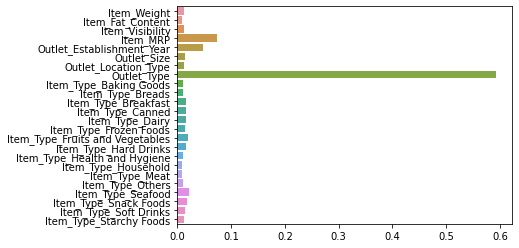

In [ ]:
# vasulization of model's perfomance
XG_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(XG_coef)
sns.barplot(model.feature_importances_, model.feature_names_in_)

**Summary:**

Out of the 6 models, Random Forest works the best on our data with the average of 51.6% 